# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


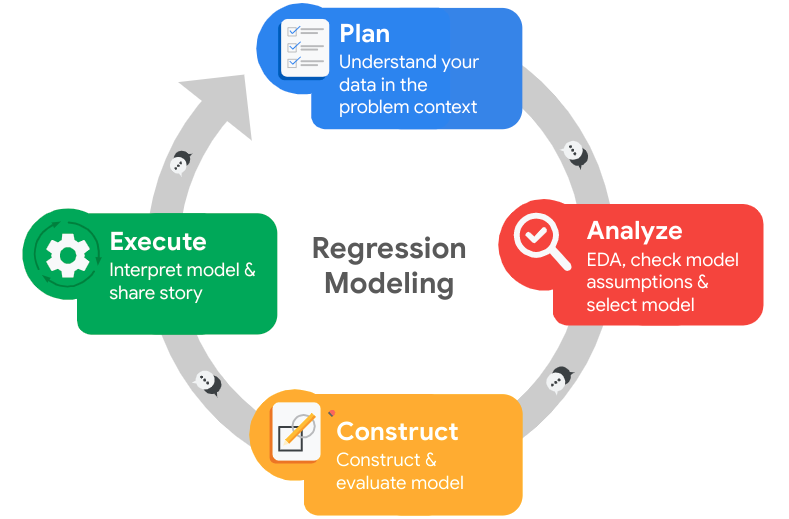

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

   1. Who are your stakeholders for this project?
   2. What are you trying to solve or accomplish?
   3. What are your initial observations when you explore the data?
   4. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
   5. Do you have any ethical considerations in this stage?




1. HR team, senior leadership team, department manager, finance team, employees.
2. Understanding and reducing employee turnover by identifying the factors that contribute most to employees leaving the company.
3. satisfaction_level: lower satisfaction scores might be a key indicator of turnover risk;
last_evaluation: employee with different performance scores might be a key indicator of turnover risk;
average_monthly_hours: employee working more or fewer hours than average could be at higher risk for turnover;
number_project: number of project might correlate with stress or job satisfaction;
time_spend_company: newer employees potentially leaving more frequently due to poor fit or unmet expectation, while longer-tenured employees leaving due to stagnation or lack of promotion;
promotion_last_5years: limited growth opportunities could drive employees to seek advancement elsewhere;
salary: lower salary categories may exhibit higher turnover rates.
4. Pandas documentation for data exploration and analysis  (https://pandas.pydata.org/docs/);
Matplotlib for data visualization (https://matplotlib.org/stable/index.html)
Seaborn for data visualization (https://seaborn.pydata.org/);
Comprehensive guide to EDA (https://towardsdatascience.com/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6);
Feature selection and engineering (https://www.repath.in/gallery/feature_engineering_for_machine_learning.pdf);
Handling class imbalance (https://imbalanced-learn.org/stable/). 
5. Employee data privacy, risk that certain demographic factors bias, transparency and explainability of the model, employee consent and awareness of personal information, ethical  use of predictive insights used as sole factor in employment decisions.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={
    'satisfaction_level': 'satisfaction',
    'last_evaluation': 'evaluation_score',
    'number_project': 'num_projects',
    'average_montly_hours': 'avg_monthly_hours',
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'promotion_last_5years': 'promotion_last_5_years',
    'Department': 'department',
    'salary': 'salary_level'
}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'evaluation_score', 'num_projects', 'avg_monthly_hours',
       'tenure', 'work_accident', 'left', 'promotion_last_5_years',
       'department', 'salary_level'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction              0
evaluation_score          0
num_projects              0
avg_monthly_hours         0
tenure                    0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary_level              0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction,evaluation_score,num_projects,avg_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary_level
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction,evaluation_score,num_projects,avg_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

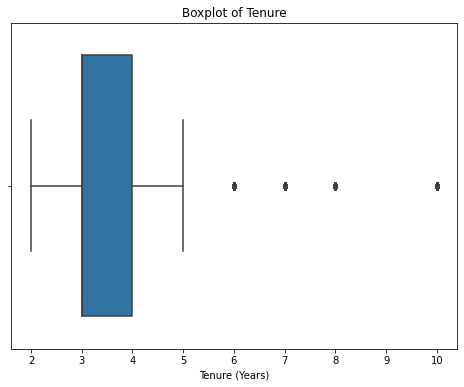

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(8,6))

sns.boxplot(x=df1['tenure'])
plt.title("Boxplot of Tenure")
plt.xlabel("Tenure (Years)")

plt.show()

In [12]:
# Determine the number of rows 'tenure' containing outliers
### YOUR CODE HERE ###
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers = df1[(df1['tenure']<lower_bound) | (df1['tenure']>upper_bound)]

print("Number of rows containing outliers in 'tenure':", len(outliers))

Number of rows containing outliers in 'tenure': 824


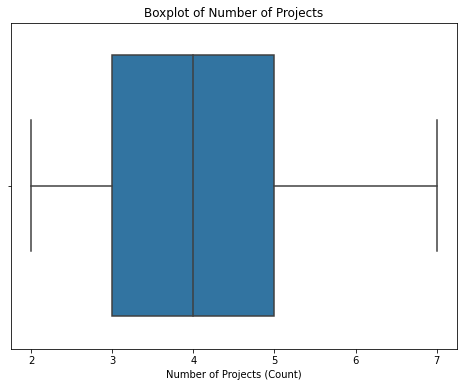

In [13]:
# Create a boxplot to visualize distribution of `num_projects` and detect any outliersplt.figure(figsize=(8,6))
plt.figure(figsize=(8,6))
sns.boxplot(x=df1['num_projects'])
plt.title("Boxplot of Number of Projects")
plt.xlabel("Number of Projects (Count)")

plt.show()

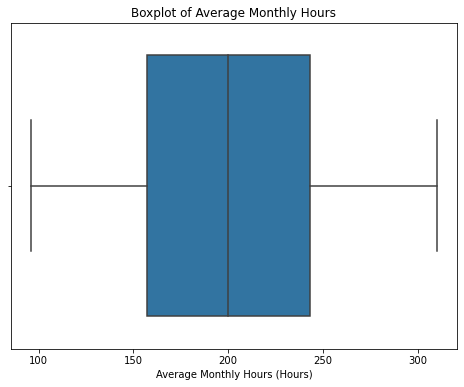

In [14]:
# Create a boxplot to visualize distribution of `avg_monthly_hours` and detect any outliersplt.figure(figsize=(8,6))
plt.figure(figsize=(8,6))
sns.boxplot(x=df1['avg_monthly_hours'])
plt.title("Boxplot of Average Monthly Hours")
plt.xlabel("Average Monthly Hours (Hours)")

plt.show()

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

1. What did you observe about the relationships between variables?
2. What do you observe about the distributions in the data?
3. What transformations did you make with your data? Why did you chose to make those decisions?
4. What are some purposes of EDA before constructing a predictive model?
5. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
6. Do you have any ethical considerations in this stage?




1. Correlation Map shows 'satisfaction' stands out as the most significant factor influencing employee turnover.
2. The dataset has 83% employee left and 17 employee stayed.
3. There are no data transformation in this stage because category data has been transformed into numeric, such as 'left' and 'promotion_last_5_years'.
4. EDA ensures that the data used is clean, the assumptions for modeling are checked, and relevant features are selected or engineered to create the most effective and accurate model.
5. Pandas, Seaborn, and Matplotlib.
6. Introduce biases analysis. For instance, assuming that certain departments directly correlate with turnover, leading to unfair conclusions.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
left_counts = df1['left'].value_counts()
print("Counts of employee who left vs stayed")
print(left_counts)

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
left_percentages = df1['left'].value_counts(normalize=True)*100
print('\nPercentages of employee who left vs stayed')
print(left_percentages)

Counts of employee who left vs stayed
0    10000
1     1991
Name: left, dtype: int64

Percentages of employee who left vs stayed
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

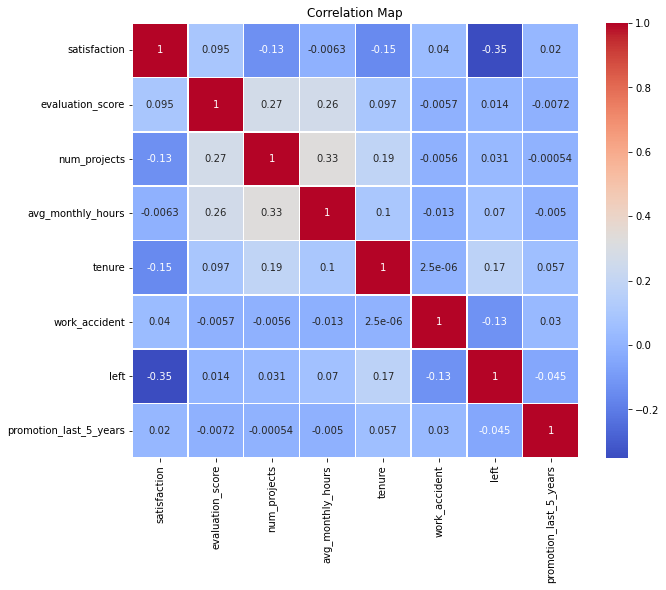

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

# See how numerical variables are correlated with each other
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map')
plt.show()

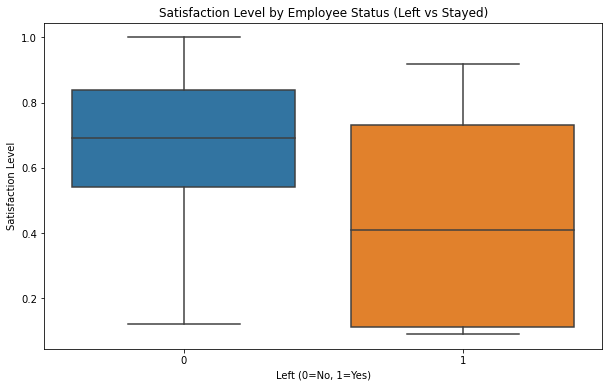

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

# See how satisfaction level varies across employees who left vs stayed
plt.figure(figsize=(10,6))
sns.boxplot(x='left', y='satisfaction', data=df1)
plt.title('Satisfaction Level by Employee Status (Left vs Stayed)')
plt.xlabel('Left (0=No, 1=Yes)')
plt.ylabel('Satisfaction Level')
plt.show()

In [18]:
# Calculate mean and median satisfaction level
df1.groupby(['left'])['satisfaction'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


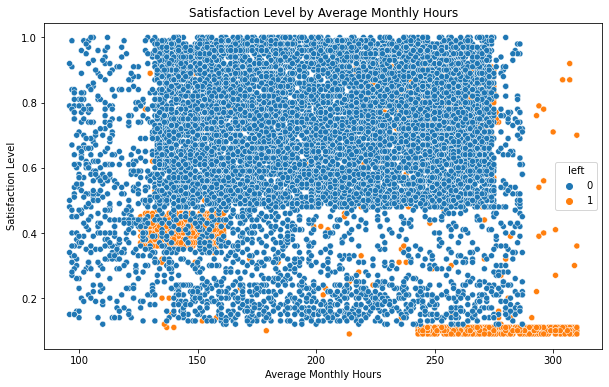

In [19]:
# See avg_monthly_hours vs satisfaction, comparing employees who left vs stay
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='satisfaction', hue='left')
plt.title('Satisfaction Level by Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')

plt.show()

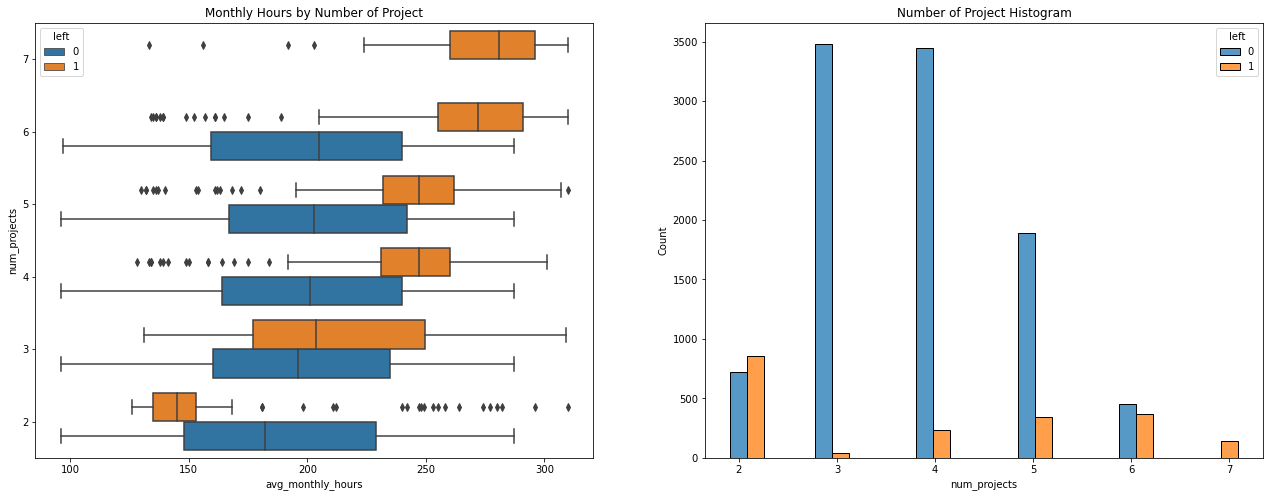

In [20]:
fig,ax = plt.subplots(1,2,figsize=(22,8))

# Show average_monthly_hours distribution for number_project, comparing who left vs stayed
sns.boxplot(data=df1, x='avg_monthly_hours', y='num_projects', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours by Number of Project')

# Show distributin of num_project, comparing employee who left vs stayed
sns.histplot(data=df1, x='num_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of Project Histogram')

plt.show()

In [21]:
# Get value counts of employee left with 7 projects
df1[df1['num_projects']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

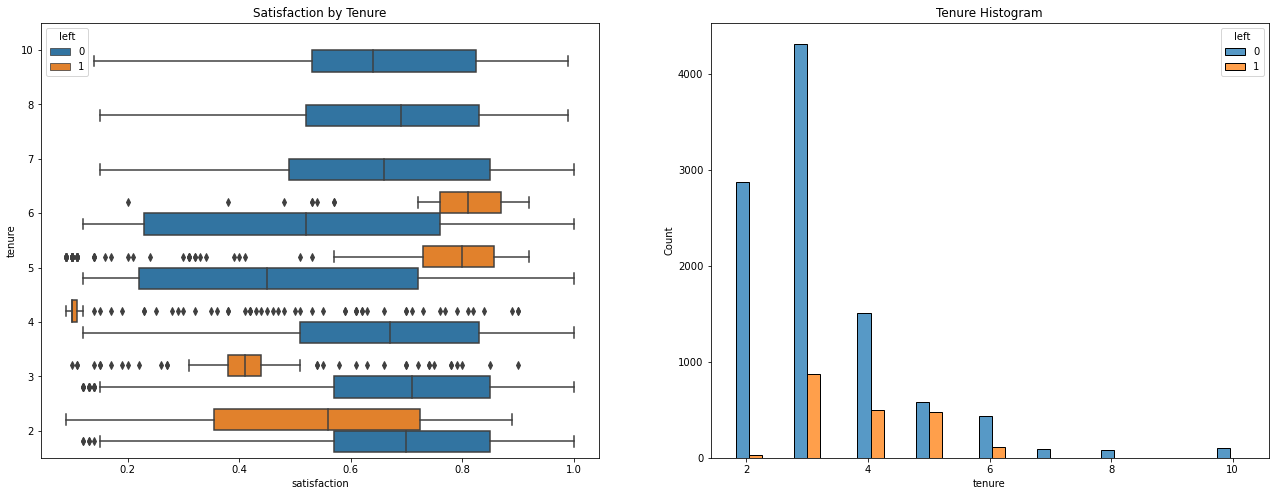

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

fig,ax = plt.subplots(1,2,figsize=(22,8))

# Show distribution of satisfaction_level by tenure, comparing employee who left vs stayed
sns.boxplot(data=df1, x='satisfaction', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure')

# Show distribution of tenure, comparing employee who left vs stayed
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure Histogram')

plt.show()

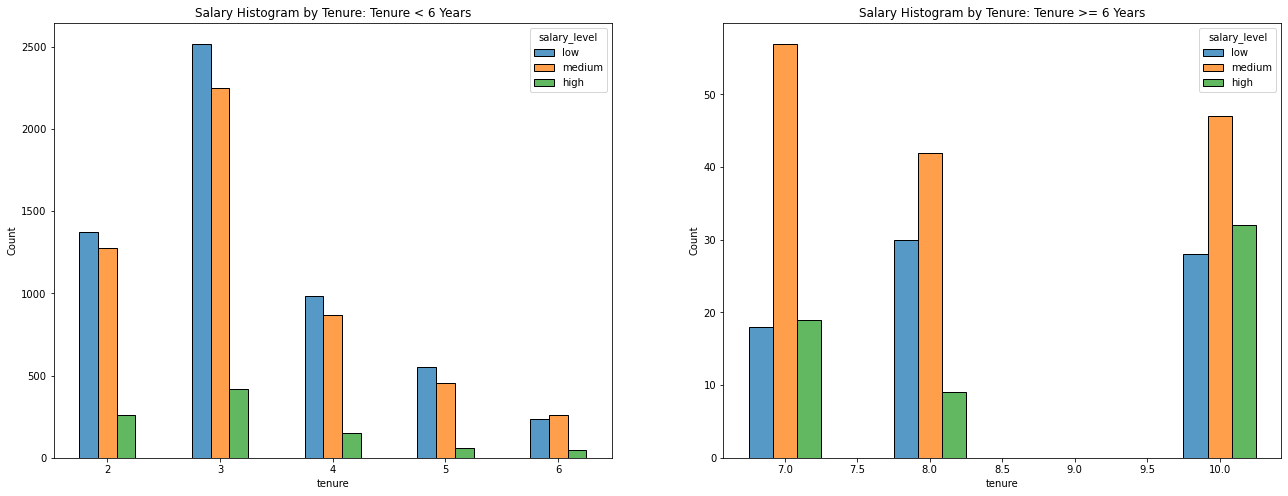

In [23]:
# Examine salary levels for differen tenure

fig,ax = plt.subplots(1,2,figsize=(22,8))

# Define short-tenure employee
tenure_short = df1[df1['tenure']<7]

# Define long-tenure employee
tenure_long = df1[df1['tenure']>6]

# Plot short-tenure histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary_level', discrete=1, 
    hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary Histogram by Tenure: Tenure < 6 Years')

# Plot short-tenure histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary_level', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[1])
ax[1].set_title('Salary Histogram by Tenure: Tenure >= 6 Years')

plt.show()

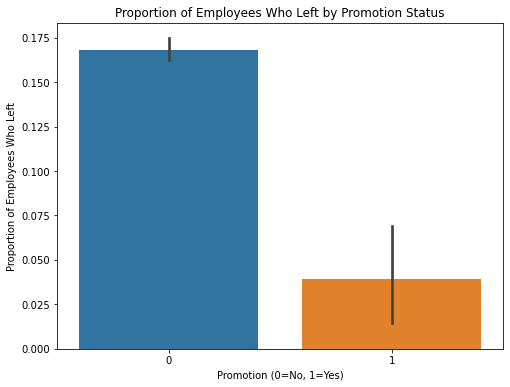

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###

# See the distribution of promotion and employees left vs stayed
plt.figure(figsize=(8,6))
sns.barplot(x='promotion_last_5_years', y='left', data=df1, estimator=lambda x: sum(x)/len(x))
plt.title('Proportion of Employees Who Left by Promotion Status')
plt.xlabel('Promotion (0=No, 1=Yes)')
plt.ylabel('Proportion of Employees Who Left')
plt.show()

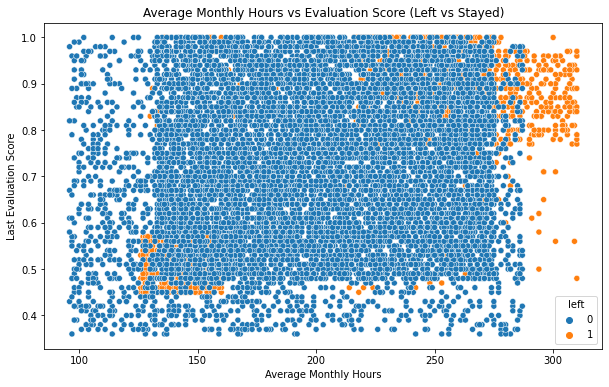

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###

# Observe relationship between average monthly hours vs last evaluation score
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_monthly_hours', y='evaluation_score', hue='left', data=df1)
plt.title('Average Monthly Hours vs Evaluation Score (Left vs Stayed)')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation Score')
plt.show()

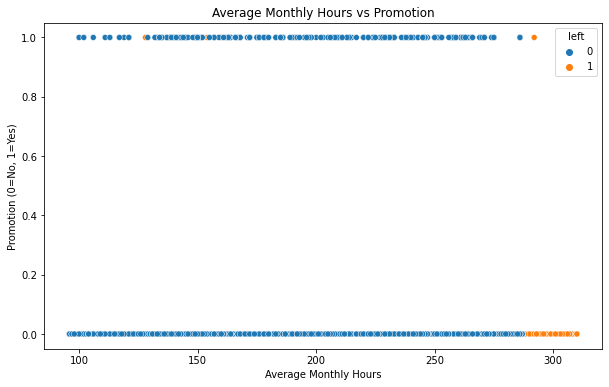

In [26]:
# Examine whether employees who worked very long hours were promoted in the last 5 years
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='promotion_last_5_years', hue='left')
plt.title('Average Monthly Hours vs Promotion')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Promotion (0=No, 1=Yes)')
plt.show()

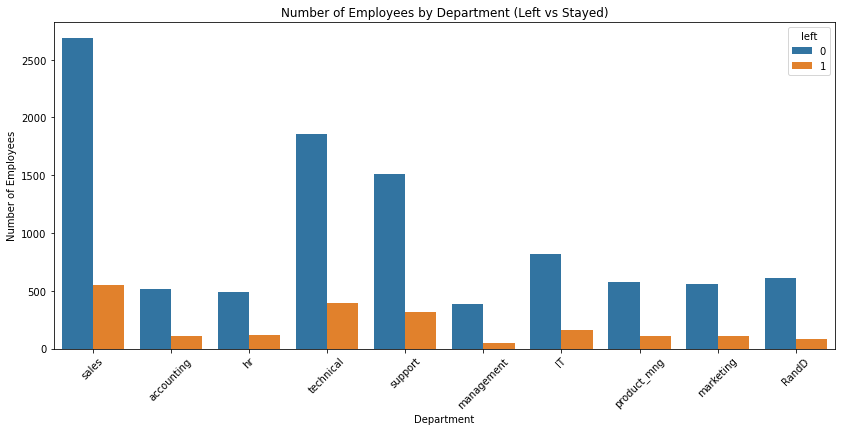

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###

# See the distribution of department for employees who left vs stayed
plt.figure(figsize=(14,6))
sns.countplot(x='department', hue='left', data=df1)
plt.title('Number of Employees by Department (Left vs Stayed)')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

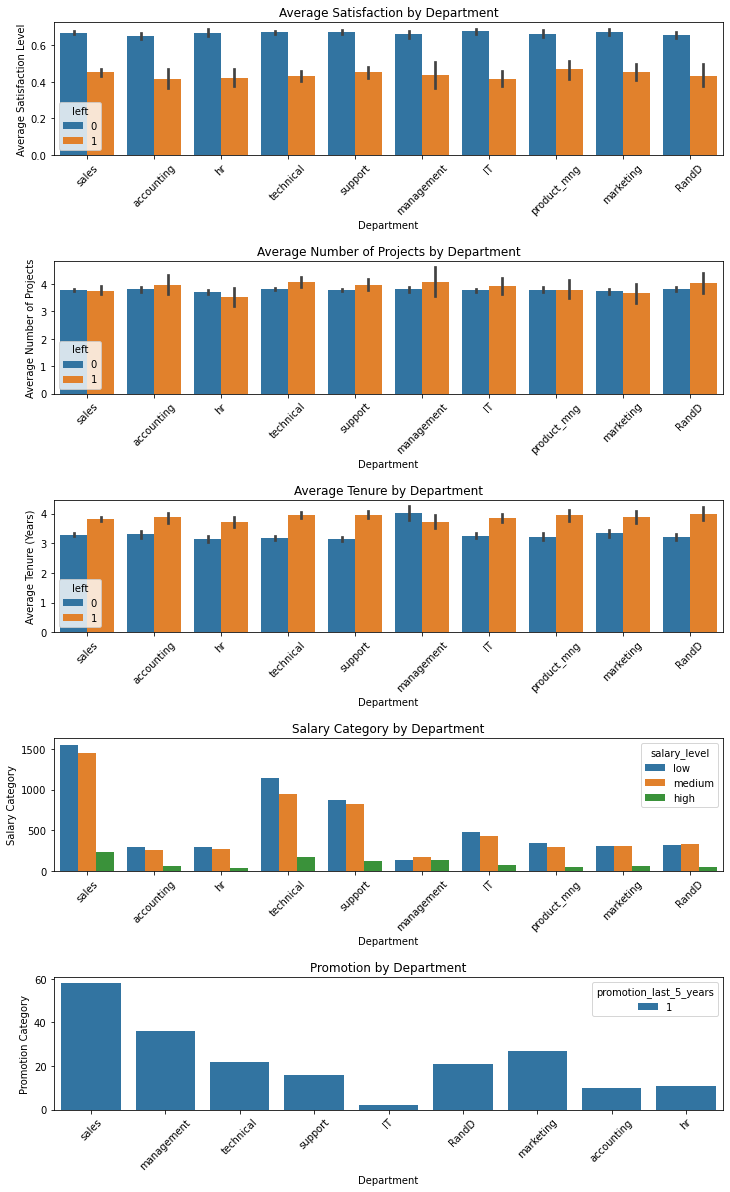

In [28]:
# Show the features values in every department
fig,ax = plt.subplots(5,1,figsize=(12,20))

# Show average satisfaction level for each department
sns.barplot(x='department', y='satisfaction', hue='left', data=df1, ax=ax[0])
ax[0].set_title('Average Satisfaction by Department')
ax[0].set_xlabel('Department')
ax[0].set_ylabel('Average Satisfaction Level')
ax[0].tick_params(axis='x', rotation=45)

# Show average number of project for each department
sns.barplot(x='department', y='num_projects', hue='left', data=df1, ax=ax[1])
ax[1].set_title('Average Number of Projects by Department')
ax[1].set_xlabel('Department')
ax[1].set_ylabel('Average Number of Projects')
ax[1].tick_params(axis='x', rotation=45)

# Show average tenure for each department
sns.barplot(x='department', y='tenure', hue='left', data=df1, ax=ax[2])
ax[2].set_title('Average Tenure by Department')
ax[2].set_xlabel('Department')
ax[2].set_ylabel('Average Tenure (Years)')
ax[2].tick_params(axis='x', rotation=45)

# Show average salary for each department
sns.countplot(x='department', hue='salary_level', data=df1, ax=ax[3])
ax[3].set_title('Salary Category by Department')
ax[3].set_xlabel('Department')
ax[3].set_ylabel('Salary Category')
ax[3].tick_params(axis='x', rotation=45)

# Show promotion status for each department
df_promotion_1 = df1[df1['promotion_last_5_years']==1]

sns.countplot(x='department', hue='promotion_last_5_years', data=df_promotion_1, ax=ax[4])
ax[4].set_title('Promotion by Department')
ax[4].set_xlabel('Department')
ax[4].set_ylabel('Promotion Category')
ax[4].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.8)
plt.show()

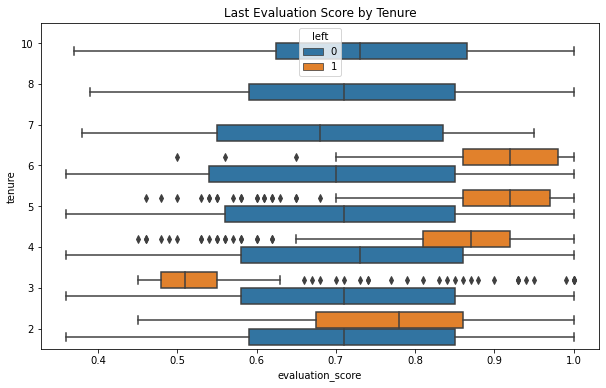

In [54]:
# Show distribution of evaluation score by tenure
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='evaluation_score', y='tenure', hue='left', orient='h')
plt.gca().invert_yaxis()
plt.title('Last Evaluation Score by Tenure')

plt.show()

### Insights

1. Correlation Map shows 'satisfaction' stands out as the most significant factor influencing employee turnover. 
2. Satisfaction Level by Average Monthly Hours indicates employee who has high average monthly hours (above 225 hours/month) has low 'satisfaction'. Furthermore, employee who has low average monthly hours (below 160 hours/months) has low 'satisfaction' as well. It indicates that working too long or below average monthly hours influencing employee turnover.
3. Monthly Hours by Number of Project boxplot shows as the number project increases, the average monthly hours tend to increase. This is consistent across both groups (left vs stayed). The median average monhtly hours for employee who left are significantly increase for the number of project above 3.
4. Tenure Histogram shows the peak employee who stayed is at 3 projects, indicating 3 project is the optimum number of project for employee. Lower and upper than 3 number projects will affect employee turnover.
5. Employees with less than 6 years of tenure tend to remain in the low salary bracket, showing initial salary growth is limited. Employees who stay longer (6+ years) tend to shift towards medium and high salary levels. It suggests that while the salary pregression exists, it might be slow initially and more substantial for employees who remain with the company for extended periods.
6. Proportion of Employees Who Left by Promotion Status bar chart shows higher proportion of employees who were not promoted left the company. This suggest a positive correlation between receiving promotion and employee retention.
7. Promotion should be correlated to avarage working hours. Higher working hours means higher evaluation score to get employee promoted. However, in the Average Monthly Hours vs Evaluation Score scatter plot, the consentration of evaluation score is considered same with average working hours between 125-275 hours/month. It shows that there are no obvious relationship between working hours and evaluation score.
8. Previous analysis is reinforced with Average Monthly Hours vs Promotion scatter plot. The data points are scattered across the plot, suggesting that working more hours does not guarantee a promotion.
9. Number of Employees by Department bar chart shows sales, technical, and support department have the high number of employee who left the company.
10. However, justified the turnover based on department can be mislead. It can shown on satisfaction, number of project, and tenure that distrubuted evenly in every department.
11. Employee with tenure 3 years or less who left the company tend to have lower evaluarion score compared to those who stayed. Employee with 4-6 years of tenure, those with higher evaluation score have left the company. Employee, with longer tenure (7-10 years) generally show stable and higher evaluation, and most of the remain with the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

1. Do you notice anything odd?
2. Which independent variables did you choose for the model and why?
3. Are each of the assumptions met?
4. How well does your model fit the data?
5. Can you improve it? Is there anything you would change about the model?
6. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
7. Do you have any ethical considerations in this stage?



1. ‘salary_level’ is still in object categories. It requires encode to the numeric variables.
2. I choose all variables except 'department' because it would be bias if department type is included in algorithm building to predict whether the employee will stay or leave.
3. One of the model assumptions for logistic regression is no severe multicollinearity among the features. The heatmaps show that there are no features with strong correlation. All the correlation coefficient are below 0,8.
4. The model performs reasonably well in predicting "would not leave" with high precision (85%) and high recall (95%). However, it struggles with predicting "would leave" with low precision (48%) and recall (23%).
5. One strategy to improve the performance is trying other classification algoriths like Random Forest or XGBoost. It can be done by optimizing hyperparameters of the model using technique like grid search or random search to find the best configuration.
6. Scikit-learn Documentation on Logistic Regression, Towards Data Science: Logistic Regression, Machine Learning Mastery: Feature Selection, Scikit-learn Feature Selection Guide.
7. Ethical consideration at this stage is considering the consequences of incorrenct prediction could lead to an unjustified decision affecting someone's job or advancement opportunity.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task is a classification task. Specially, attempting to predict categorical outcome (employee leave or stay) based on various features.

### Identify the types of models most appropriate for this task.

The most appropriate model is logistic regression. It is because logistic regression is a simple yet effective model for binary classification.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [29]:
# Create mapping for 'salary_level'
salary_mapping = {'low':1, 'medium':2, 'high':3}

# Applied mapping to 'salary_level'
df1['salary_level'] = df1['salary_level'].map(salary_mapping)

In [30]:
df2 = df1.drop(columns=['department'])

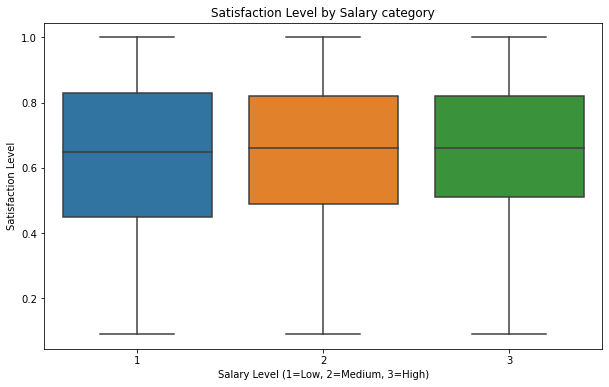

In [31]:
# See how satisfaction level varies across salary level
plt.figure(figsize=(10,6))
sns.boxplot(x='salary_level', y='satisfaction', data=df2)
plt.title('Satisfaction Level by Salary category')
plt.xlabel('Salary Level (1=Low, 2=Medium, 3=High)')
plt.ylabel('Satisfaction Level')
plt.show()

The median satisfactionis nearlu the same across all salary categories, indicating that salary level does not significantly affect employee satisfaction.

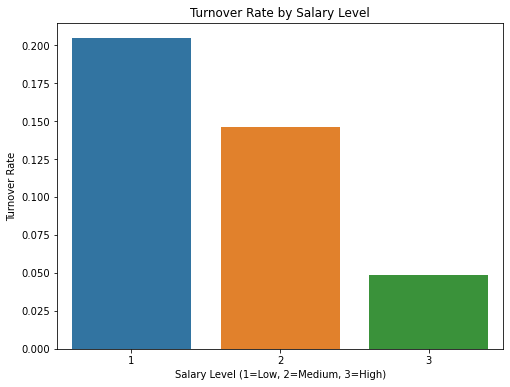

In [32]:
# Calculate turnover rate by salary level
turnover_rate = df2.groupby('salary_level')['left'].mean().reset_index()

# Rename columns
turnover_rate.columns = ['salary_level', 'turnover_rate']

# Plotting the turnover rate by salary level
plt.figure(figsize=(8,6))
sns.barplot(data=turnover_rate, x='salary_level', y='turnover_rate')
plt.title('Turnover Rate by Salary Level')
plt.xlabel('Salary Level (1=Low, 2=Medium, 3=High)')
plt.ylabel('Turnover Rate')

plt.show()

Employees with the lowest salary level have the highest turnover rate, suggesting low salary level lead employee to leave the company.

In [33]:
# Remove 'tenure' outlier value
df3 = df2[(df2['tenure']>=lower_bound) & (df2['tenure']<=upper_bound)]

In [34]:
df3.dtypes

satisfaction              float64
evaluation_score          float64
num_projects                int64
avg_monthly_hours           int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5_years      int64
salary_level                int64
dtype: object

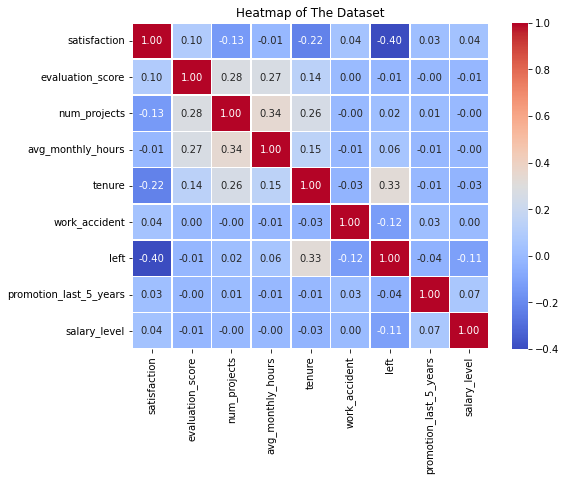

In [35]:
# Create heatmap to visualize how correlated variables are
plt.figure(figsize=(8,6))
sns.heatmap(df3.corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=.5)
plt.title('Heatmap of The Dataset')

plt.show()

In [36]:
# Select the outcome variables
y = df3['left']

In [37]:
# Select features
X = df3.drop(columns=['left'])

X.head()

,satisfaction,evaluation_score,num_projects,avg_monthly_hours,tenure,work_accident,promotion_last_5_years,salary_level
0,0.38,0.53,2,157,3,0,0,1
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
5,0.41,0.50,2,153,3,0,0,1


In [38]:
# Split dataset into training and holdout dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Initiate the logistic regression model
log_reg_model =  LogisticRegression(max_iter=1000)

# Fit the model to the training data
log_clf = log_reg_model.fit(X_train, y_train)

In [40]:
# Save predictions
y_pred = log_clf.predict(X_test)

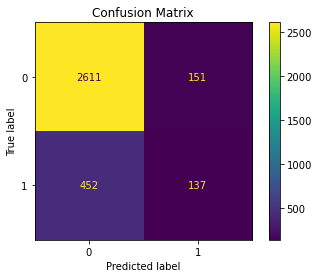

In [41]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)

# Plot confusion matrix
disp.plot(values_format='')

#Display plot
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Create classification report
target_names = ['Predicted would not leave', 'predicted would leave']
class_report = classification_report(y_test, y_pred, target_names=target_names)

print(class_report)

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.95      0.90      2762
    predicted would leave       0.48      0.23      0.31       589

                 accuracy                           0.82      3351
                macro avg       0.66      0.59      0.60      3351
             weighted avg       0.79      0.82      0.79      3351



In [43]:
# Interpret model coefficients


# Get feature names from training dataframe
feature_names = X_train.columns

# Get the model coefficients (log-odds ratios)
model_coefficients = log_clf.coef_[0]

# Create the dataframe
coefficients_df3 = pd.DataFrame(
    {'Features': feature_names,
     'Coefficient (Log-odds Ratio)': model_coefficients}
)

# Display the data frame sorted by aboslute values of the coefficients
coefficients_df3 = coefficients_df3.reindex(coefficients_df3['Coefficient (Log-odds Ratio)'].abs().sort_values(ascending=False).index)
coefficients_df3.reset_index(drop=True, inplace=True)

coefficients_df3

,Features,Coefficient (Log-odds Ratio)
0,satisfaction,-4.452905
1,work_accident,-1.536662
2,tenure,1.045225
3,promotion_last_5_years,-0.694319
4,salary_level,-0.556749
5,num_projects,-0.461625
6,evaluation_score,-0.147517
7,avg_monthly_hours,0.003668


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

1. What key insights emerged from your model(s)?
2. What business recommendations do you propose based on the models built?
3. What potential recommendations would you make to your manager/company?
4. Do you think your model could be improved? Why or why not? How?
5. Given what you know about the data and the models you were using, what other questions could you address for the team?
6. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
7. Do you have any ethical considerations in this stage?

1. Satisfaction has the strongest negative coefficient, meaning employees with higher satisfaction levels are less likely to leave; Employees who have experienced work accidents are more likely to leave, indicated by negative coefficient; Tenure has a positive association with turnover, meaning longer-tenured employees might have higher turnover risk; Lack of promotion in the last 5 years is associated with a higher likelihood of turnover; Higher salary levels are associated with lower turnover rates; The number of projects also has a slight impact on turnover
2. Increase efforts to boosts employee satisfaction through initiatives like regular feedback mechanisms, career development opportunities, and work-life balance program; Implement clearer career progression paths, promote internal opportunities, and recognize high performers; Ensure that project workloads are balanced and manageable; Regularly assess performance review process and explore how performance feedback impacts employee engagement
3. Increase efforts to boosts employee satisfaction through initiatives like regular feedback mechanisms, career development opportunities, and work-life balance program; Implement clearer career progression paths, promote internal opportunities, and recognize high performers; Ensure that project workloads are balanced and manageable; Regularly assess performance review process and explore how performance feedback impacts employee engagement
4. The model could likely be improved. This is mainly because linear regression assumes linear relationship between features. However, employee turnover may have complex, non-linear patterns. Experiment with nonlinear algorithms like decision tree, random forest, or gradient boosting may improve prediction performance. These models can capture interactions and nonlinear relationships more effectively, potentially improving predictive accuracy.
5. How do satisfaction levels vary across different salary levels? Are there seasonal trends in employee turnover?
How does turnover rate differ between employees with different salary levels?
6. Scikit-learn documentation; Seaborn and Matplotlib documentation; Data science and machine learning blog (towardsdatascience.com, analyticsvidhya.com); An Introduction to Statistical Learning textbook; Pattern Recognition and Machine Learning textbook
7. My model is ethical because it suggests improvements in job satisfaction and work conditions, not to penalize employees

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

- Satisfaction has the strongest negative impact on likelihood of employees leaving. A lower satisfaction score significantly increase the odds of attrition
- Work accident negatively influences attrition. Employees who had accidents are less likely to leave.
- Tenure shows a positive coefficient, suggesting that employees with longer tenure are slightly more likely to leave
- Promotion, salary level, and number of project have moderate negative impacts, implying these factors help retain employees
- Evaluation score has a weak negative effect, indicating a slight tendency for those with lower evaluation scores to leave
- Average monthly hours has an almost neutral effect, mening it does not strongly influence employee attrition

### Conclusion, Recommendations, Next Steps

#### Conclusion

The model successfully identified the key factors influencing employee attrition and achieved a decent accuracy of 82% in predicting employee retention. However, it struggled to accurately predict employees who are likely to leave, as evidenced by the low recall (23%) and moderate precision (48%) for the leaving class. The strongest predictor of attrition is satisfaction, which has a significant negative relationship with leaving. Other important factors include tenure (positive influence) and work accident (negative influence). Fetures like salary level and number of project had weaker but still relevant impacts on attrition.

#### Recommendation

- Conduct employee engagement surveys to identify dissatisfaction drivers
- Implement intiatives to improve job satisfaction, such as recognition programs or career development opportunities
- Pay special attention to employees with longer tenure by offering tailored growth paths, mentorship programs, and personalized rewards
- Ensure employees feel valued by promoting more frequently based on performance and potential

#### Next Steps

- Experiment with advanced algorithms such as Random Forest, Gradient Boosting, or XGBoost to improve predictive power
- Gather additional features, such as job roles, manager relationshops, or exit interview insights to enrich the dataset
- Use the insights from the model to create attrition risk dashboard, highlighting high-risk employees
- Retrain the model periodically with updated data to capture changes in employee behaviour

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.